# 230968364 Manish_R
## Week 7 Q2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load dataset
df = pd.read_csv("D:\\230968364\\week3\\Iris.csv")
df.drop(columns=['Id'], inplace=True)  # Drop ID column if present
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# Split features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train initial decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Print classification report and confusion matrix
print("Initial Model Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Initial Model Performance:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Optimize Hyperparameters Using Grid Search • Use GridSearchCV to tune max_depth, min_samples_split, and criterion. • Report the best hyperparameter combination and corresponding accuracy.

In [3]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 10),
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy_best)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best Model Accuracy: 1.0


In [4]:
### Pruning the Decision Tree • Implement post-pruning using cost-complexity pruning (ccp_alpha). • Find the optimal ccp_alpha by plotting accuracy vs. ccp_alpha values.

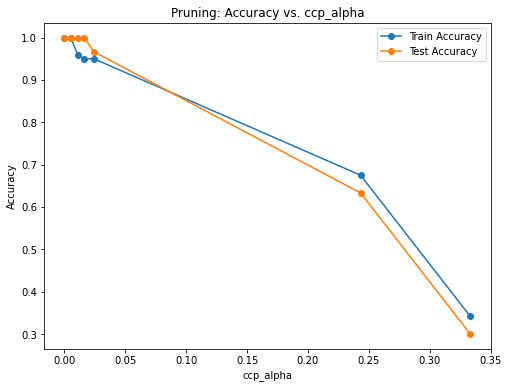

In [5]:
# Pruning the decision tree
path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train, y_train)
    train_scores.append(pruned_tree.score(X_train, y_train))
    test_scores.append(pruned_tree.score(X_test, y_test))

# Plot accuracy vs ccp_alpha
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Pruning: Accuracy vs. ccp_alpha")
plt.show()

### Feature Importance Analysis • Extract and plot feature importance values from the trained decision tree. • Drop the least important feature and retrain the model. Does accuracy improve or decline?

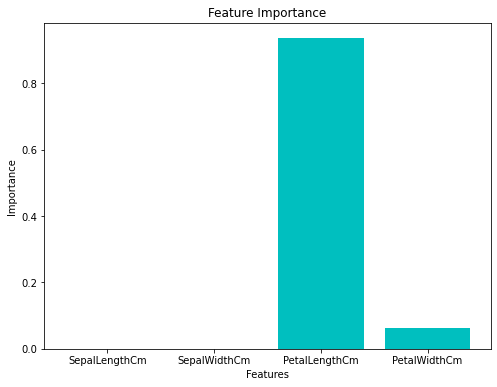

Dropped feature: SepalLengthCm
Retrained Model Accuracy: 1.0


In [7]:
# Feature importance analysis
feature_importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='c')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

# Drop least important feature and retrain
least_important_feature = features[np.argmin(feature_importances)]
X_train_new = X_train.drop(columns=[least_important_feature])
X_test_new = X_test.drop(columns=[least_important_feature])

dt_retrained = DecisionTreeClassifier(random_state=42, **best_params)
dt_retrained.fit(X_train_new, y_train)
y_pred_retrained = dt_retrained.predict(X_test_new)
accuracy_retrained = accuracy_score(y_test, y_pred_retrained)

print(f"Dropped feature: {least_important_feature}")
print("Retrained Model Accuracy:", accuracy_retrained)